In [1]:
#Imports
import pandas as pd
from pandas import DataFrame, Series
from pandas.core.resample import TimeGrouper
from pandas.tseries.offsets import DateOffset
import json
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

from IPython.display import HTML
import folium
from wordcloud import WordCloud, STOPWORDS

from scipy.misc import imread

import nltk

In [2]:
derby = pd.read_csv('/home/theresa/derby_cleantext.csv')
list(derby)
#shows names of the dataframe's columns

['created_at', 'CleanText']

/home/theresa/anaconda3/envs/py35/lib/python3.5/site-packages/wordcloud/wordcloud.py:291: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0 and"


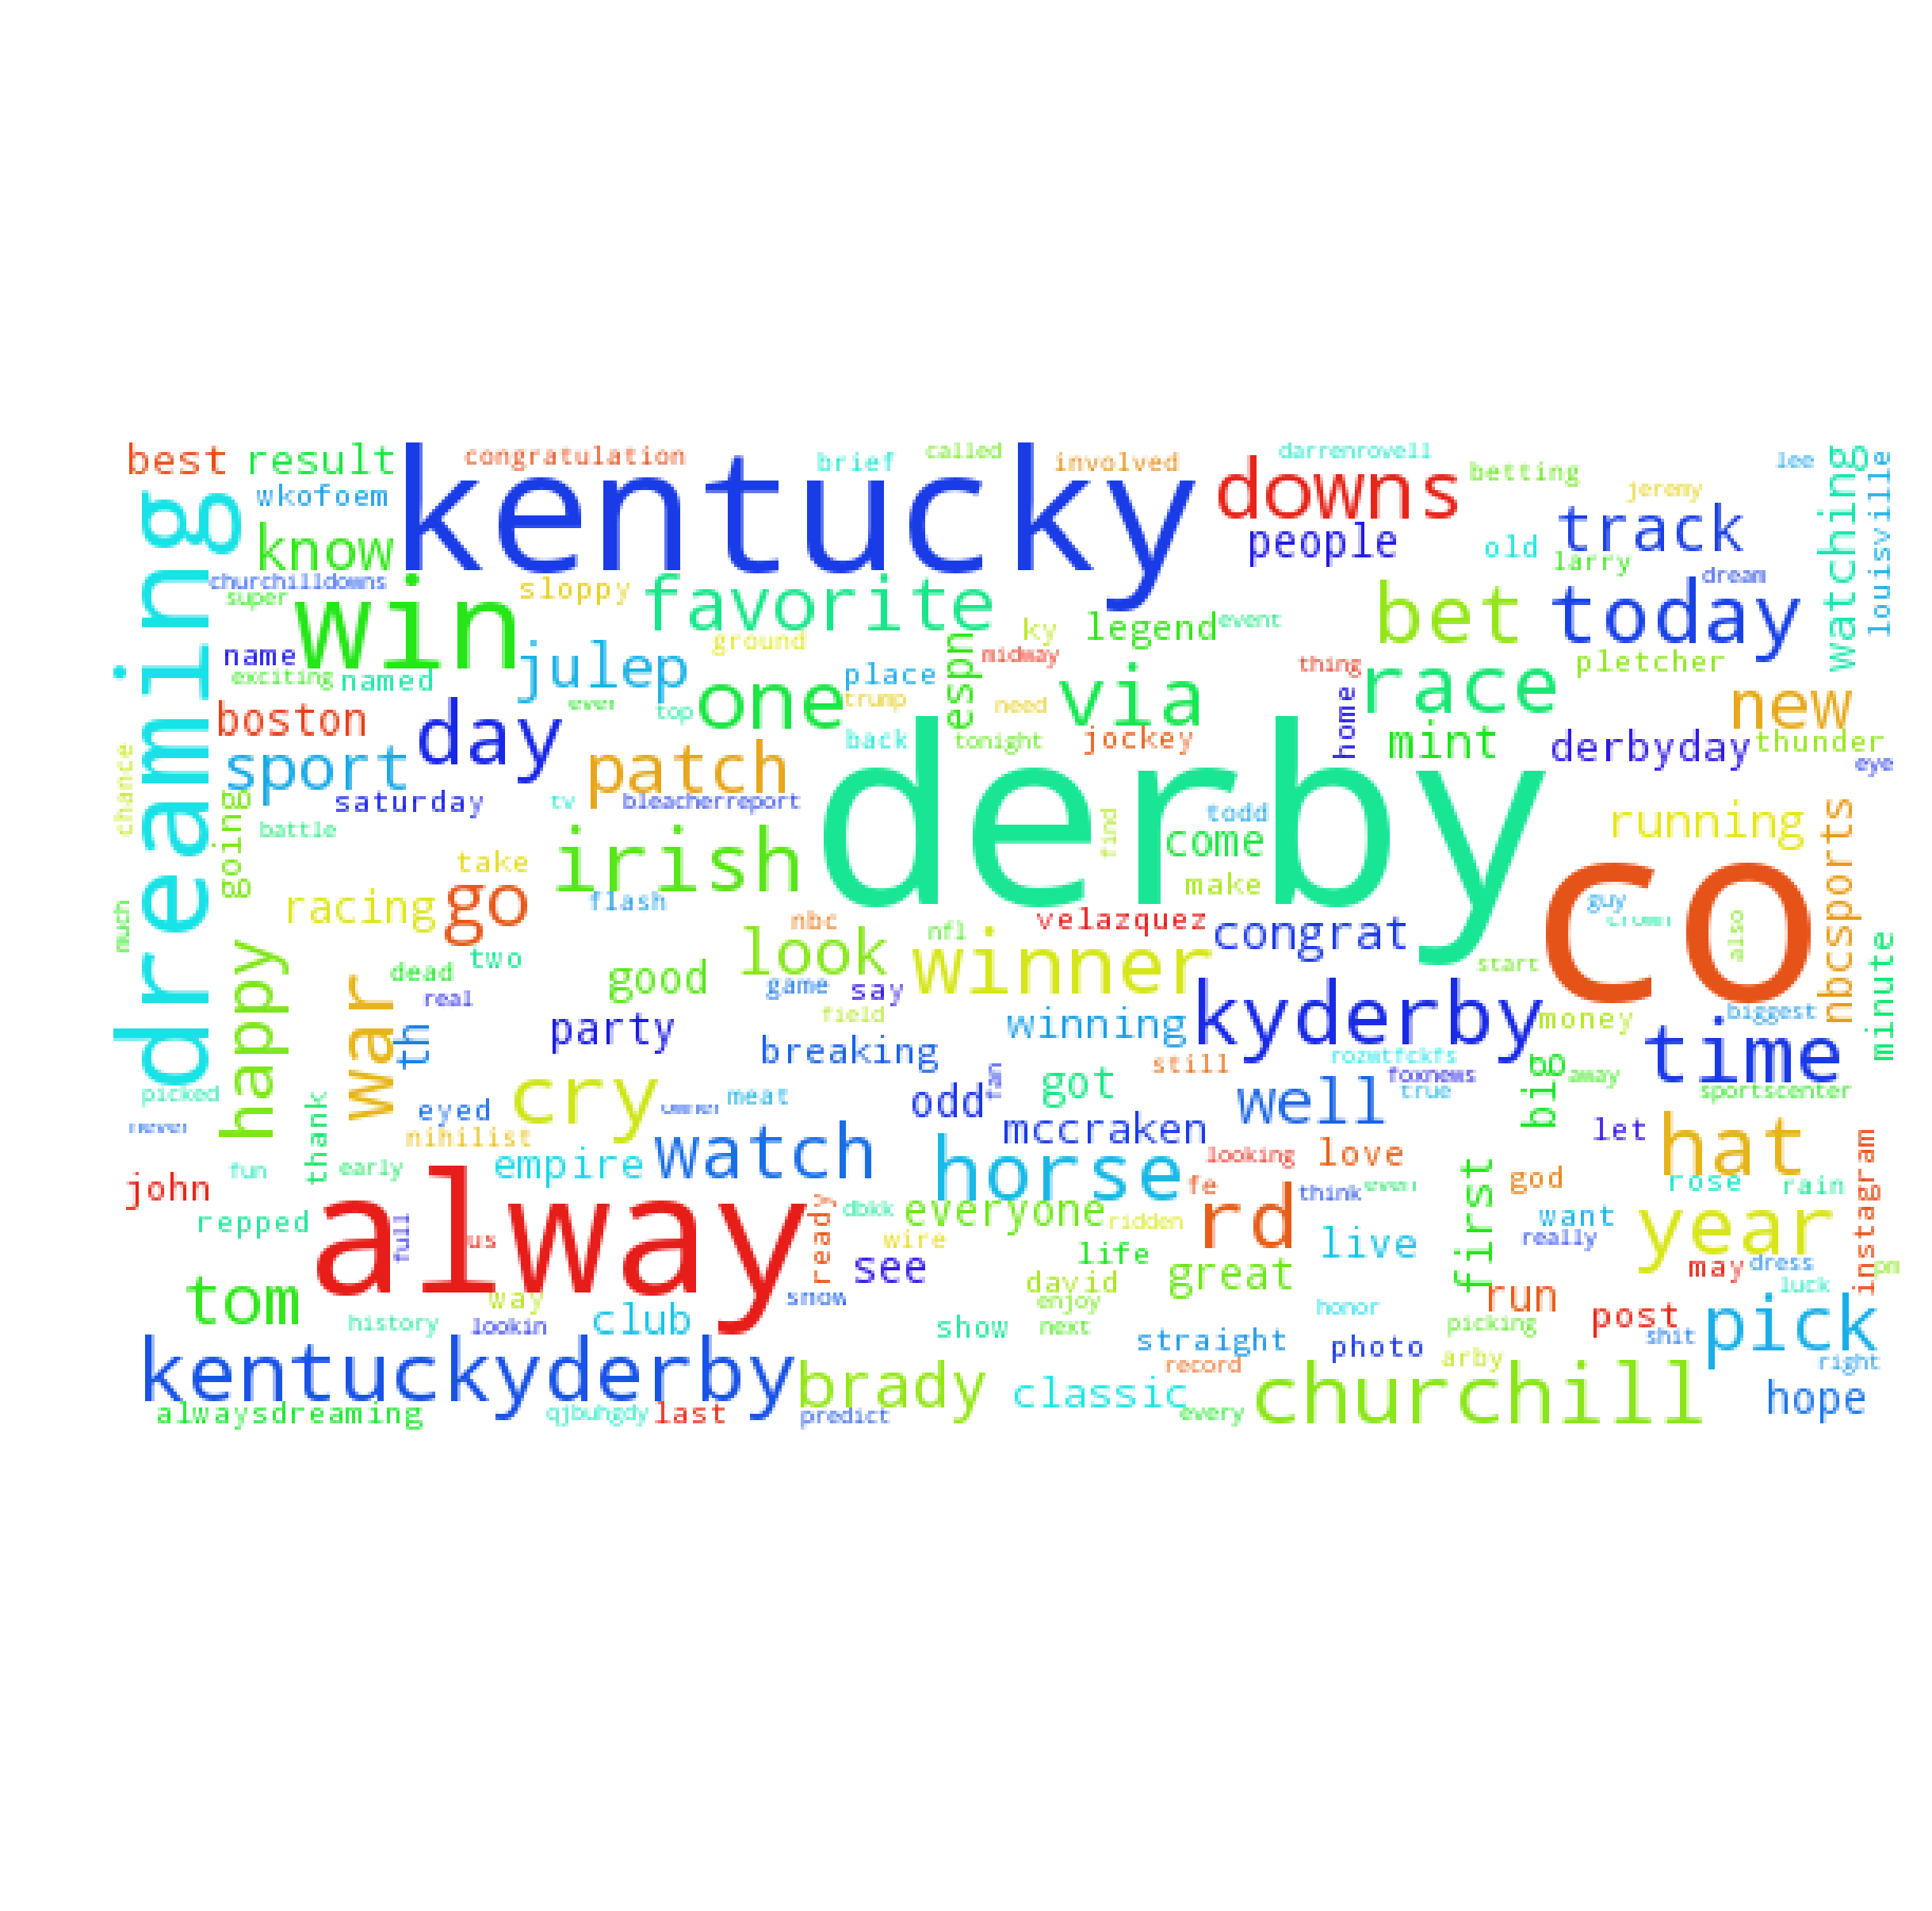

In [29]:
# join tweets to a single string
words = ' '.join(derby['CleanText'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
twitter_mask = imread('/home/theresa/horse_race.png', flatten=True)

plt.figure(num=None, figsize=(15, 10), dpi=300)
wordcloud = WordCloud(
                      #font_path='/Library/Fonts/Arial.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=twitter_mask
            ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('twitter_derby.png', dpi=300)
plt.show()

In [ ]:
nltk.download('punkt')

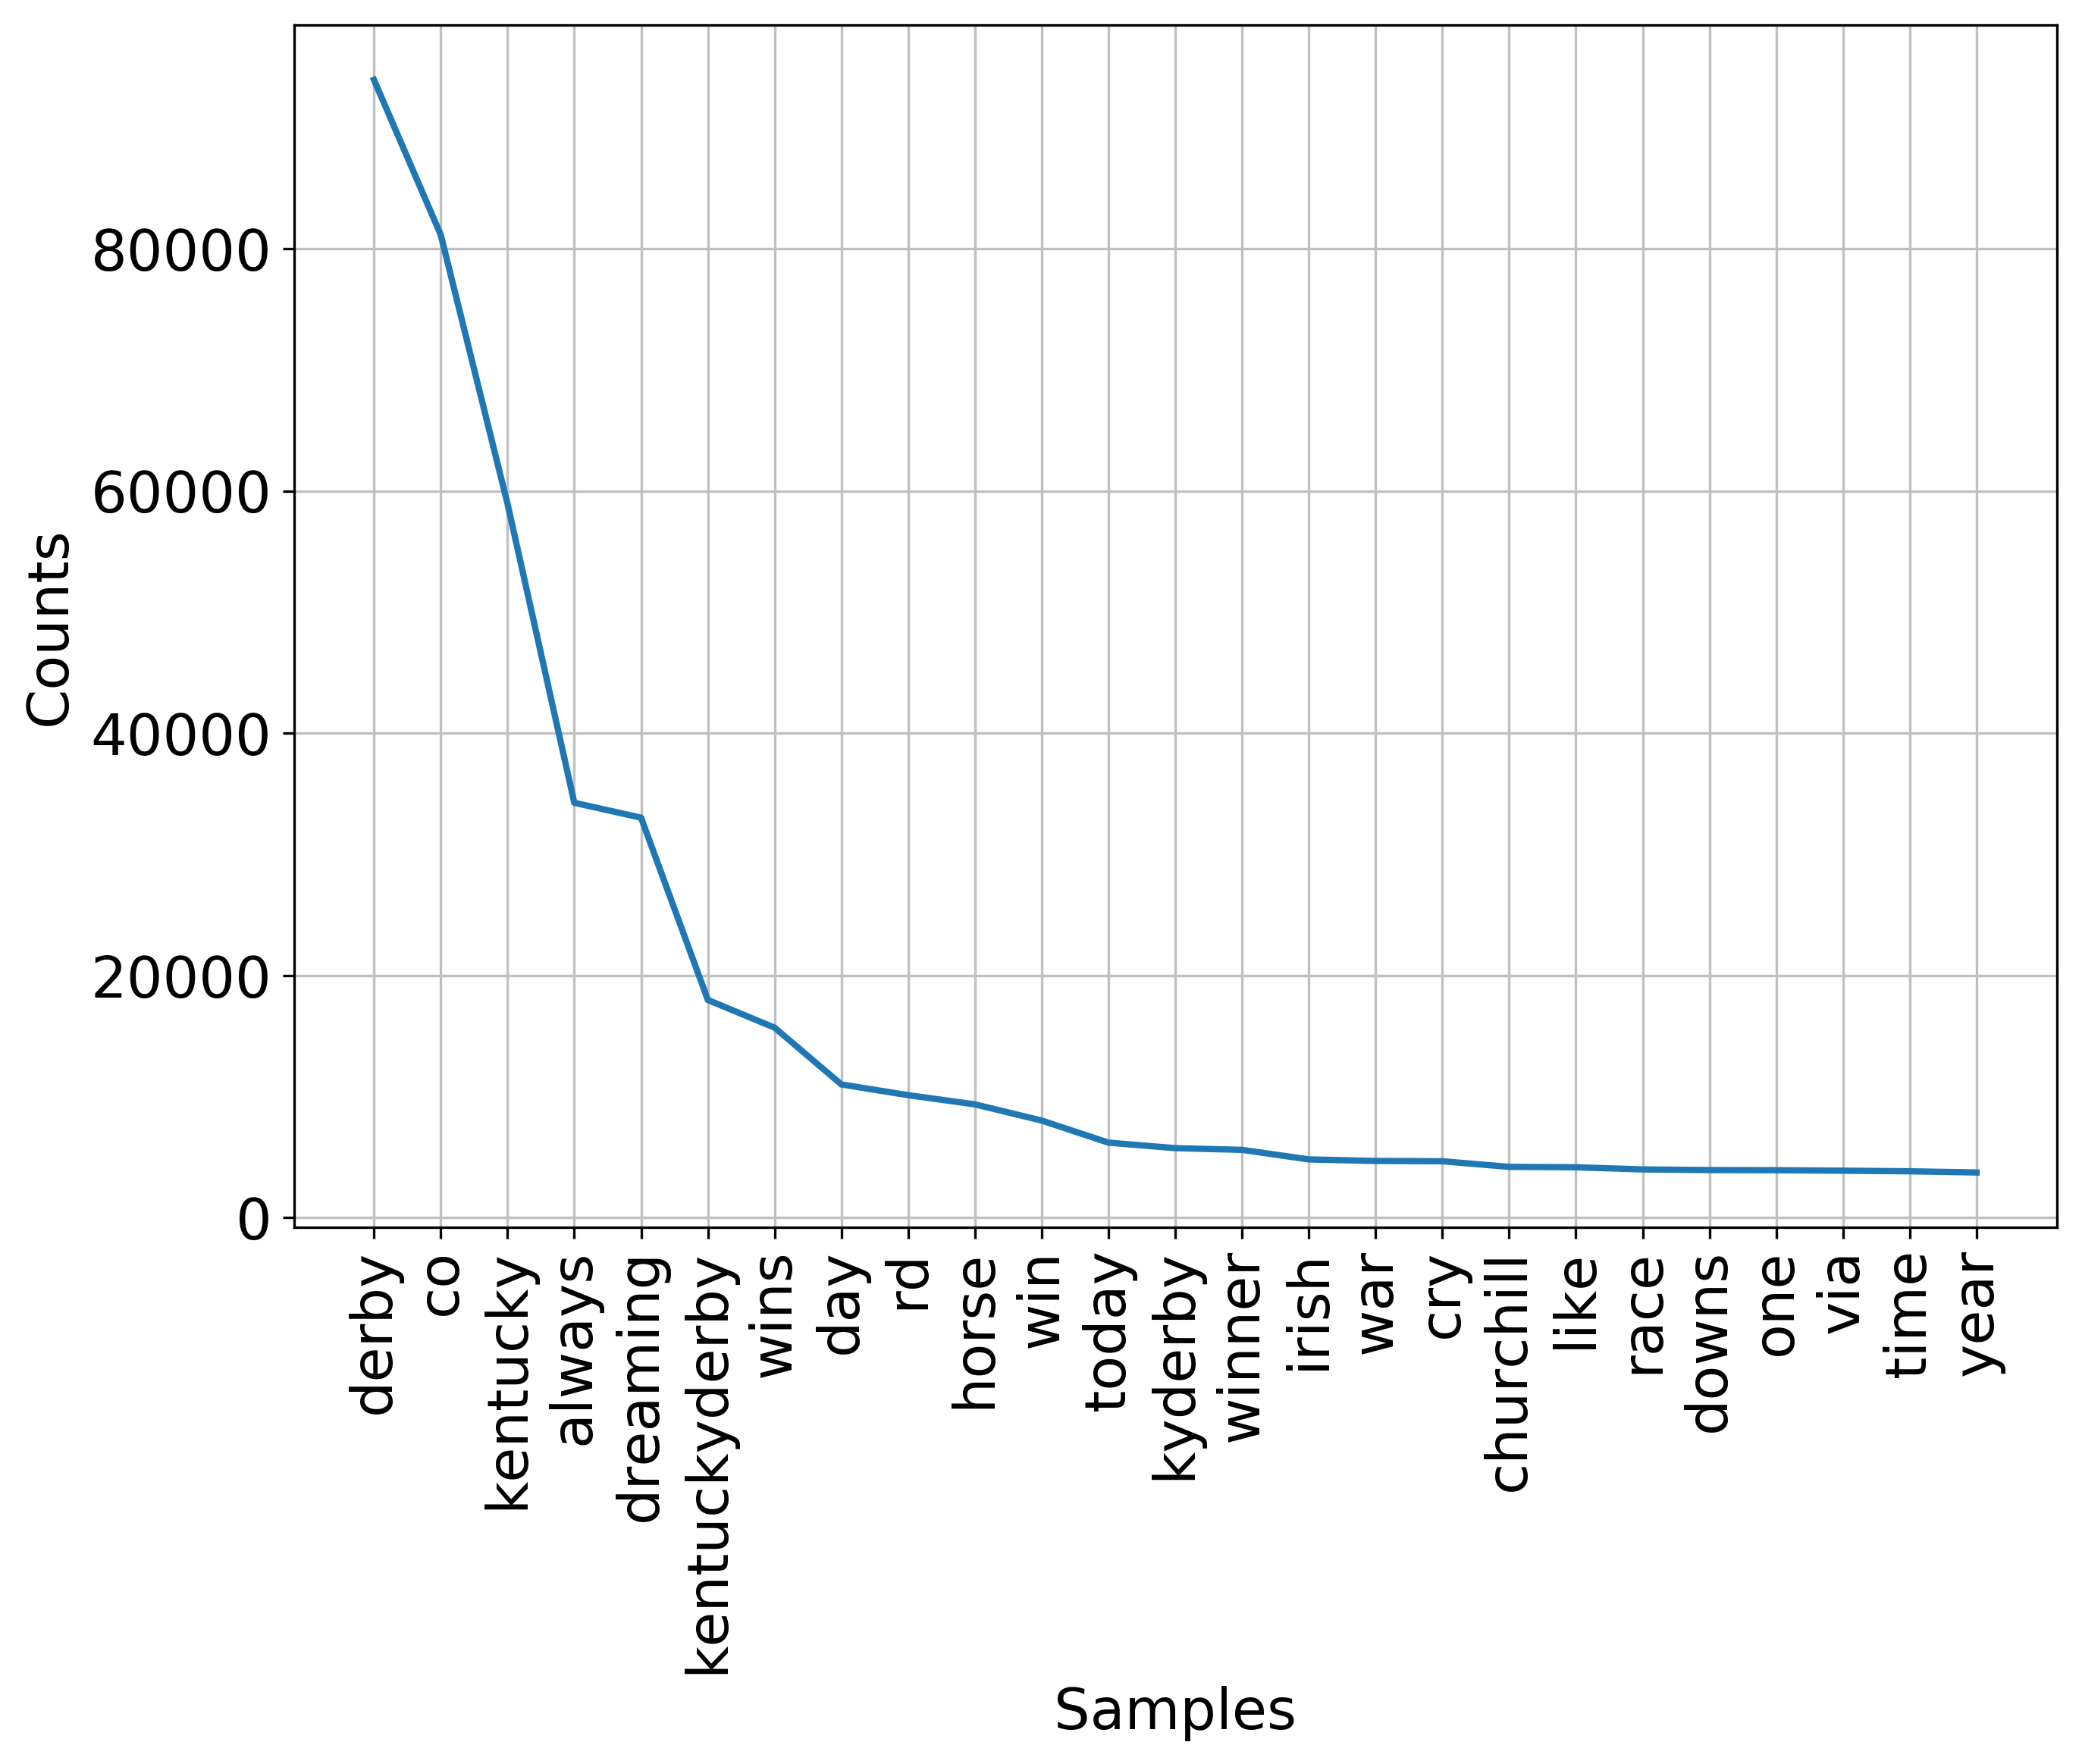

In [33]:
# Tokenize into words
tokens = []
for tweet in derby['CleanText']:
    for word in nltk.word_tokenize(tweet):
        tokens.append(word)
tokens[:10]
freq_dist = nltk.FreqDist(tokens)
plt.figure(num=None, figsize=(10, 7), dpi=300)
ax = plt.subplot()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
freq_dist.plot(25)